In [3]:
import pandas as pd
import numpy as np
import ast
import gzip
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

<h1>STEAM GAMES</h1>

In [74]:
#Carga de DataSet steam_games
steam_games=pd.read_json('../Datasets/steam_games.json.gz',compression='gzip',lines=True)


In [75]:

# Elimina las filas donde todos sus valores son nulos
steam_games.dropna(how='all',inplace=True)


In [76]:
#Proceso de Limpieza Columna 'id'
steam_games[steam_games['id'].isnull()]


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88384,None,None,None,None,http://store.steampowered.com/,None,None,None,None,19.99,0.0,NaN,None
119271,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260,2012-09-07,"[Action, Open World, Batman, Adventure, Stealt...",None,"[Single-player, Steam Achievements, Steam Trad...",19.99,0.0,NaN,"Rocksteady Studios,Feral Interactive (Mac)"


In [77]:
steam_games[steam_games['title'] == 'Batman: Arkham City - Game of the Year Edition'] 

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
89378,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260/Batma...,2012-09-07,"[Action, Open World, Batman, Adventure, Stealt...",http://steamcommunity.com/app/200260/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",19.99,0.0,200260.0,"Rocksteady Studios,Feral Interactive (Mac)"
119271,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260,2012-09-07,"[Action, Open World, Batman, Adventure, Stealt...",None,"[Single-player, Steam Achievements, Steam Trad...",19.99,0.0,NaN,"Rocksteady Studios,Feral Interactive (Mac)"


In [78]:
#Se puede observar que se encontraron dos filas con id nuelos.
#El primero carece de gran parte de su informacion, por tanto sera eliminada.
#El segundo se puede concluir que se trata de una fila duplicada donde una de 
#esta no tiene el id, por lo que sera eliminada

steam_games.dropna(subset=['id'],inplace=True)


In [79]:

#Busqueda de duplicados
duplicates = steam_games[steam_games.duplicated(subset=['id'], keep=False)]
print(duplicates)


                 publisher    genres                          app_name  \
102204  Bethesda Softworks  [Action]  Wolfenstein II: The New Colossus   
102883  Bethesda Softworks  [Action]  Wolfenstein II: The New Colossus   

                                   title  \
102204  Wolfenstein II: The New Colossus   
102883  Wolfenstein II: The New Colossus   

                                                      url release_date  \
102204          http://store.steampowered.com/app/612880/   2017-10-26   
102883  http://store.steampowered.com/app/612880/Wolfe...   2017-10-26   

                                                     tags  \
102204  [Action, FPS, Gore, Violent, Alternate History...   
102883  [Action, FPS, Gore, Violent, Alternate History...   

                                              reviews_url  \
102204  http://steamcommunity.com/app/612880/reviews/?...   
102883  http://steamcommunity.com/app/612880/reviews/?...   

                                                    s

In [80]:
#Se puede observar dos filas duplicada, por tanto se elimina una de estas
steam_games.drop_duplicates(subset=['id'], keep='first', inplace=True)

In [81]:
#Convertir los valores de la columna 'id' en enteros
steam_games['id'] = steam_games['id'].astype(int)
steam_games.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32132 entries, 88310 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24081 non-null  object 
 1   genres        28850 non-null  object 
 2   app_name      32131 non-null  object 
 3   title         30083 non-null  object 
 4   url           32132 non-null  object 
 5   release_date  30066 non-null  object 
 6   tags          31970 non-null  object 
 7   reviews_url   32132 non-null  object 
 8   specs         31463 non-null  object 
 9   price         30755 non-null  object 
 10  early_access  32132 non-null  float64
 11  id            32132 non-null  int32  
 12  developer     28834 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 3.3+ MB


In [82]:
steam_games.isnull().sum()

publisher       8051
genres          3282
app_name           1
title           2049
url                0
release_date    2066
tags             162
reviews_url        0
specs            669
price           1377
early_access       0
id                 0
developer       3298
dtype: int64

In [83]:
#Proceso de Limpieza Columna 'app_name'

#Busqueda de app_name nulos
steam_games[steam_games['app_name'].isnull()]


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
90890,None,"[Action, Indie]",None,None,http://store.steampowered.com/app/317160/_/,2014-08-26,"[Action, Indie]",http://steamcommunity.com/app/317160/reviews/?...,"[Single-player, Game demo]",None,0.0,317160,None


In [84]:
#Se encontro una appe_nume nula la cual carece de otras informaciones imnportantes,
# por lo que sera eliminada
steam_games.dropna(subset=['app_name'],inplace=True)

In [85]:
#Proceso de Limpieza Columna 'developer'
#Se remplazara los nulos de developer por los de publisher
steam_games['developer'].fillna(steam_games['publisher'],inplace=True)


In [86]:
#Proceso de limpieza columna 'genres'
#Los valores de tags son iguales a genres, cargare los fataltante de genres con tags, 
#y creo un conjunto (set) con totos valores unicos de genres.

#Creando un conjunto ( set) que contiene todos los 
#géneros únicos presentes en la columna 'géneros' del DataFrame
genres = set(item for val in steam_games['genres'].dropna() for item in val)

In [87]:
#Filtrando las etiquetas 'tags' para mantener solo aquellas 
#que están presentes en 'genres'
steam_games['tags'] = steam_games['tags'].apply(lambda x: [item for item in x if item in genres] if isinstance(x, list) else x) 


In [88]:
#Carga de valores nulos en la columna 'genres' con valores de 'tags'
steam_games['genres'].fillna(steam_games['tags'], inplace=True)


In [89]:
#Funcion que añade valores a 'geners' que estan en 'tags'
 #Función que añade valores de 'tags' a 'genres' que no estén ya presentes en 'genres'
def agregar_genres(fila):
    genres = fila['genres']
    tags = fila['tags']
    if isinstance(tags,list) and isinstance(genres,list):
        for tag in tags:
            if tag not in genres:
                genres.append(tag)
    return genres


In [90]:
#Aplicando la función 'agregar_genres' a todos los elementos en el dataframe
steam_games['genres'] = steam_games.apply(lambda fila: agregar_genres(fila), axis=1)

In [91]:
#Creacion de columnas ficticias a travez d dumies con los valores de geners
# Ahora voy a generar dummies para genres 
steam_games['genres'] =  steam_games['genres'].apply(lambda x:".".join(x) if isinstance(x, list) else x)
dummies = steam_games['genres'].str.get_dummies(sep='.')
dummies = dummies.groupby(dummies.columns, axis=1).sum()
steam_games = pd.concat([steam_games,dummies],axis=1)
steam_games.head(2)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
88310,Kotoshiro,Action.Casual.Indie.Simulation.Strategy,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,...,0,0,0,1,0,0,1,0,0,0
88311,"Making Fun, Inc.",Free to Play.Indie.RPG.Strategy,Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG]",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,...,0,1,0,0,0,0,1,0,0,0


In [92]:

#### Elimino todas las columnas inecesarias
# publisher
# genres
# title
# url
# tags
# discount_price
# reviews_url
# early_access
# specs
# price


steam_games = steam_games.drop(columns=['publisher', 'genres', 'title', 'url', 'tags', 'reviews_url', 'early_access', 'specs', 'price'])

In [93]:
steam_games.isnull().sum()

app_name                        0
release_date                 2066
id                              0
developer                    3232
Accounting                      0
Action                          0
Adventure                       0
Animation &amp; Modeling        0
Audio Production                0
Casual                          0
Design &amp; Illustration       0
Early Access                    0
Education                       0
Free to Play                    0
Indie                           0
Massively Multiplayer           0
Photo Editing                   0
RPG                             0
Racing                          0
Simulation                      0
Software Training               0
Sports                          0
Strategy                        0
Utilities                       0
Video Production                0
Web Publishing                  0
dtype: int64

In [94]:
#Evaluacion de Porcentaje de nulos
print(f'Porcentaje de nulos : {1 - steam_games.dropna(subset=["developer","release_date"]).shape[0] / steam_games.shape[0]}')

Porcentaje de nulos : 0.10114842364072085


In [95]:
#Entre las columnas release_date y developer hacen un 11% de valores nulos. al poder 
#hacer mas analisis y asignar valores, procedo a la eliminacion de dichas filas
steam_games.dropna(subset=['developer','release_date'],inplace=True)
steam_games.isnull().sum()

app_name                     0
release_date                 0
id                           0
developer                    0
Accounting                   0
Action                       0
Adventure                    0
Animation &amp; Modeling     0
Audio Production             0
Casual                       0
Design &amp; Illustration    0
Early Access                 0
Education                    0
Free to Play                 0
Indie                        0
Massively Multiplayer        0
Photo Editing                0
RPG                          0
Racing                       0
Simulation                   0
Software Training            0
Sports                       0
Strategy                     0
Utilities                    0
Video Production             0
Web Publishing               0
dtype: int64

In [96]:
print(steam_games.info())

<class 'pandas.core.frame.DataFrame'>
Index: 28881 entries, 88310 to 120443
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   app_name                   28881 non-null  object
 1   release_date               28881 non-null  object
 2   id                         28881 non-null  int32 
 3   developer                  28881 non-null  object
 4   Accounting                 28881 non-null  int64 
 5   Action                     28881 non-null  int64 
 6   Adventure                  28881 non-null  int64 
 7   Animation &amp; Modeling   28881 non-null  int64 
 8   Audio Production           28881 non-null  int64 
 9   Casual                     28881 non-null  int64 
 10  Design &amp; Illustration  28881 non-null  int64 
 11  Early Access               28881 non-null  int64 
 12  Education                  28881 non-null  int64 
 13  Free to Play               28881 non-null  int64 
 14  Indie 

In [97]:
#Proceso de Limpieza Columna release_date
steam_games['release_date'].value_counts()


release_date
2012-10-16     100
2017-08-31      92
2017-09-26      88
2017-07-25      78
2017-12-19      75
              ... 
2018年1月          1
预热群52756441      1
Jan 2018         1
2018-01-25       1
2018-10-01       1
Name: count, Length: 3401, dtype: int64

In [98]:
#Verifico el formato de los año usando re
# Función para verificar el formato 'YYYY-MM-DD'
def is_valid_date_format(date_str):
    regex = r'^\d{4}-\d{2}-\d{2}$'
    return re.match(regex, date_str) is not None

# Crear una máscara booleana para las fechas que no tienen el formato 'YYYY-MM-DD'
invalid_date_mask = ~steam_games['release_date'].astype(str).apply(is_valid_date_format)

# Filtrar las filas con fechas que no tienen el formato 'YYYY-MM-DD'
invalid_dates = steam_games[invalid_date_mask]

# Mostrar las fechas que no tienen el formato 'YYYY-MM-DD'
print(invalid_dates['release_date'])

88320           Soon..
88353             2017
88354        Beta测试已开启
88560         Jun 2009
88816         Oct 2010
              ...     
120392      15.01.2018
120393        Q1, 2018
120397     Coming Soon
120407            2016
120433    January 2018
Name: release_date, Length: 285, dtype: object


In [99]:
#Hago una funcion para tratar los valores que no tienen el formato YYYY-MM-DD
def arreglar_errores(fecha: str):
    try:
        # Intenta convertir la fecha directamente a entero
        return int(fecha)
    except ValueError:
        try:
            # Intenta dividir la fecha usando un espacio en blanco como delimitador y convierte la segunda parte a entero
            return int(fecha.split(" ")[1])
        except (IndexError, ValueError):
            try:
                # Intenta dividir la fecha usando "." como delimitador y convierte la tercera parte a entero
                return int(fecha.split(".")[2])
            except (IndexError, ValueError):
                try:
                    # Intenta dividir la fecha usando un espacio en blanco como delimitador y convierte la quinta parte a entero
                    return int(fecha.split(" ")[4])
                except (IndexError, ValueError):
                    # Si no se puede convertir, devuelve None
                    return None

In [100]:
steam_games.loc[invalid_date_mask, 'Year'] = steam_games.loc[invalid_date_mask, 'release_date'].apply(arreglar_errores)

# Convertir las fechas válidas a datetime y extraer el año
valid_date_mask = ~invalid_date_mask
steam_games.loc[valid_date_mask, 'Year'] = pd.to_datetime(steam_games.loc[valid_date_mask, 'release_date'], errors='coerce').dt.year

In [101]:
#llevo la columna Year a formato int
steam_games['Year'] = steam_games['Year'].astype('Int64')

In [102]:
print(steam_games.info())

<class 'pandas.core.frame.DataFrame'>
Index: 28881 entries, 88310 to 120443
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   app_name                   28881 non-null  object
 1   release_date               28881 non-null  object
 2   id                         28881 non-null  int32 
 3   developer                  28881 non-null  object
 4   Accounting                 28881 non-null  int64 
 5   Action                     28881 non-null  int64 
 6   Adventure                  28881 non-null  int64 
 7   Animation &amp; Modeling   28881 non-null  int64 
 8   Audio Production           28881 non-null  int64 
 9   Casual                     28881 non-null  int64 
 10  Design &amp; Illustration  28881 non-null  int64 
 11  Early Access               28881 non-null  int64 
 12  Education                  28881 non-null  int64 
 13  Free to Play               28881 non-null  int64 
 14  Indie 

In [103]:
#Elimino la Columna 'release_date'
steam_games.drop(columns=['release_date'],inplace=True)

In [104]:
#Elimino las filas con valores vacio de la columna 'Year'
steam_games['Year'].isnull().sum()
steam_games['Year'].replace('', np.nan, inplace=True)
steam_games.dropna(subset=['Year'], inplace=True)

In [105]:
#elimino la columna developer
steam_games = steam_games.drop(columns=['developer'])

In [106]:
#trabajo con el 10% de la base de datos
porcentaje_a_eliminar = 0.90

# Calcula el número de filas a eliminar
num_filas_a_eliminar = int(len(steam_games) * porcentaje_a_eliminar)

# Utiliza el método sample para seleccionar aleatoriamente las filas a eliminar
filas_a_eliminar = steam_games.sample(n=num_filas_a_eliminar, random_state=42)

# Elimina las filas seleccionadas del DataFrame original
steam_games = steam_games.drop(filas_a_eliminar.index)

In [107]:
steam_games.to_csv('../Datasets/steam_games.csv',index=False)

<h1>USERS REVIEWS</h1>

In [108]:
#Carga de DataSet Orignal
user_reviews_gz = "../Datasets/user_reviews.json.gz"
filas=[]
with gzip.open(user_reviews_gz, 'rt', encoding='MacRoman') as archivo:
    for line in archivo.readlines():
        filas.append(ast.literal_eval(line))

user_review = pd.DataFrame(filas)

In [109]:
user_review .head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


El Datasets user_review contiene 3 columnas donde la 'reviews' es una lista de diccionario que contiene iformacion de los comentarios realizados en cada juego.

por consiguiente se procede al desanidado de la columna'reviews' repitiendo las filas del usuario para cada item_id.

In [110]:
user_review_explode = user_review.explode('reviews') # Duplico las filas generando un diccionario por cada diccionario en la lista
# Ahora concateno el dataframe original, con el dataframe generado a partir de transformar los diccionarios a pandas
user_review_explode = pd.concat([user_review_explode.drop(['reviews'],axis=1),user_review_explode['reviews'].apply(pd.Series)],axis=1)  

### Elimino columnas que no seran usadas para el estudio
* user_url
* funny
* last_edited
* helpful
* 0

In [114]:
user_review_explode.drop(columns=['user_url','funny','helpful','last_edited',0],inplace=True)

In [115]:
user_review_explode.head(1)

,user_id,posted,item_id,recommend,review
0,76561197970982479,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...


<h5> A partir de la columna reveiw se hara un analisis de sentimiento, generando una nueva columna.
 Este se llamara "sentiment_analysis"  y tendra 2 para sentimiento positivo 0 para negativo y 1 para neutral
 Habiendo hecho esto elimino la columna review </h5>

In [116]:
#Hago el analisis de sentimiento en la columna review
nltk.download('vader_lexicon')
model_sentimiento = SentimentIntensityAnalyzer()


def analizador(review):
    # Obtener el puntaje de sentimiento usando SentimentIntensityAnalyzer
    sentimiento_score = model_sentimiento.polarity_scores(review)
    
    # Clasifico el sentimiento
    
    if review and not pd.isnull(review):
        if sentimiento_score['compound'] >= 0.5:
            return 2  # Sentimiento positivo
        elif sentimiento_score['compound'] <= -0.5:
            return 0  # Sentimiento negativo
        else:
            return 1  # Sentimiento neutral
    else:
        return 1

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


* Para aplicar la funcion los nulos tienen que ser vacio

In [117]:
user_review_explode['review'].fillna('',inplace=True) # Remplazo los nulos con un string vacio

In [118]:
user_review_explode['sentiment_analysis']  = user_review_explode['review'].apply(analizador)
user_review_explode.drop(columns='review',inplace=True) # Aplica la funcion que determina el sentimiento

* Grafico las el analisis por sentimiento de las reviews

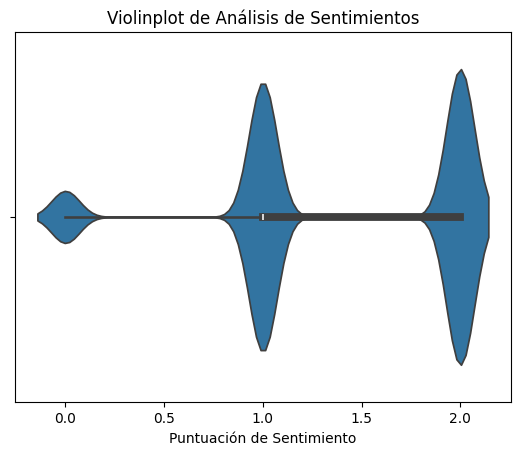

In [119]:
sns.violinplot(x='sentiment_analysis', data=user_review_explode)
plt.title('Violinplot de Análisis de Sentimientos')
plt.xlabel('Puntuación de Sentimiento')
plt.show()

Muestro la Cantidad de nulos por columna

In [121]:
user_review_explode.isnull().sum()

user_id                0
posted                28
item_id               28
recommend             28
sentiment_analysis     0
dtype: int64

In [122]:
user_review_explode[user_review_explode.isnull().any(axis=1)]

,user_id,posted,item_id,recommend,sentiment_analysis
62,gdxsd,NaN,NaN,NaN,1
83,76561198094224872,NaN,NaN,NaN,1
1047,76561198021575394,NaN,NaN,NaN,1
3954,cmuir37,NaN,NaN,NaN,1
5394,Jaysteeny,NaN,NaN,NaN,1
6135,ML8989,NaN,NaN,NaN,1
7583,76561198079215291,NaN,NaN,NaN,1
7952,76561198079342142,NaN,NaN,NaN,1
9894,76561198061996985,NaN,NaN,NaN,1
10381,76561198108286351,NaN,NaN,NaN,1


Se eliminan las filas nulas

In [123]:
user_review_explode.dropna(inplace=True)

In [124]:
user_review_explode.head()

,user_id,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,"Posted November 5, 2011.",1250,True,2
0,76561197970982479,"Posted July 15, 2011.",22200,True,1
0,76561197970982479,"Posted April 21, 2011.",43110,True,2
1,js41637,"Posted June 24, 2014.",251610,True,2
1,js41637,"Posted September 8, 2013.",227300,True,2


In [125]:
#trabajo con el 10% de la base de datos
porcentaje_a_eliminar = 0.90

# Calcula el número de filas a eliminar
num_filas_a_eliminar = int(len(user_review_explode) * porcentaje_a_eliminar)

# Utiliza el método sample para seleccionar aleatoriamente las filas a eliminar
filas_a_eliminar = user_review_explode.sample(n=num_filas_a_eliminar, random_state=42)

# Elimina las filas seleccionadas del DataFrame original
user_review_explode = user_review_explode.drop(filas_a_eliminar.index)

Exporta como csv

In [126]:
user_review_explode.to_csv('../datasets/user_reviews.csv',index=False)

<h1> USERS ITEMS </h1>

Descomprimo el dataset de items

In [4]:
def descompimir_json(ruta, variable_anidada):
    '''Función que recibe una ruta de acceso a un archivo json anidado y carga la información en un
    DataFrame de Pandas'''
    fila = []
    with gzip.open(ruta, 'rt', encoding='MacRoman') as archivo:
      for line in archivo.readlines():
          fila.append(ast.literal_eval(line))

    df = pd.DataFrame(fila)                                                 
    df = df.explode(variable_anidada).reset_index()                         
    df = df.drop(columns="index")                                           
    df = pd.concat([df, pd.json_normalize(df[variable_anidada])], axis=1)   
    df = df.drop(columns=variable_anidada)                                  

    return df

In [5]:
users_items = descompimir_json("../datasets/users_items.json.gz",'items')

In [6]:
users_items.describe()

,items_count,playtime_forever,playtime_2weeks
count,5.170015e+06,5.153209e+06,5.153209e+06
mean,3.136999e+02,9.914951e+02,9.104707e+00
std,6.924635e+02,5.418204e+03,1.403926e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.100000e+01,0.000000e+00,0.000000e+00
50%,1.370000e+02,3.400000e+01,0.000000e+00
75%,2.750000e+02,3.550000e+02,0.000000e+00
max,7.762000e+03,6.427730e+05,1.996700e+04


In [7]:
users_items.isnull().sum()

user_id                 0
items_count             0
steam_id                0
user_url                0
item_id             16806
item_name           16806
playtime_forever    16806
playtime_2weeks     16806
dtype: int64

In [8]:
users_items[users_items['item_id'].isna()]

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
3733,Wackky,0,76561198039117046,http://steamcommunity.com/id/Wackky,NaN,NaN,NaN,NaN
3849,76561198079601835,0,76561198079601835,http://steamcommunity.com/profiles/76561198079...,NaN,NaN,NaN,NaN
6019,hellom8o,0,76561198117222320,http://steamcommunity.com/id/hellom8o,NaN,NaN,NaN,NaN
6523,starkillershadow553,0,76561198059648579,http://steamcommunity.com/id/starkillershadow553,NaN,NaN,NaN,NaN
7237,darkenkane,0,76561198058876001,http://steamcommunity.com/id/darkenkane,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5169470,76561198316380182,0,76561198316380182,http://steamcommunity.com/profiles/76561198316...,NaN,NaN,NaN,NaN
5169471,76561198316970597,0,76561198316970597,http://steamcommunity.com/profiles/76561198316...,NaN,NaN,NaN,NaN
5169472,76561198318100691,0,76561198318100691,http://steamcommunity.com/profiles/76561198318...,NaN,NaN,NaN,NaN
5170006,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,NaN,NaN,NaN,NaN


Todos los nulos hacen referencia a las mismas filas por esto seran eliminados

In [9]:
users_items.dropna(inplace=True)

### Por ultimo elimino las columnas que no usare
* user_url
* playtime_2weeks
* steam_id
* item_name

In [10]:
users_items.drop(columns=['user_url','playtime_2weeks','steam_id', 'item_name'], inplace=True)

<Axes: ylabel='playtime_forever'>

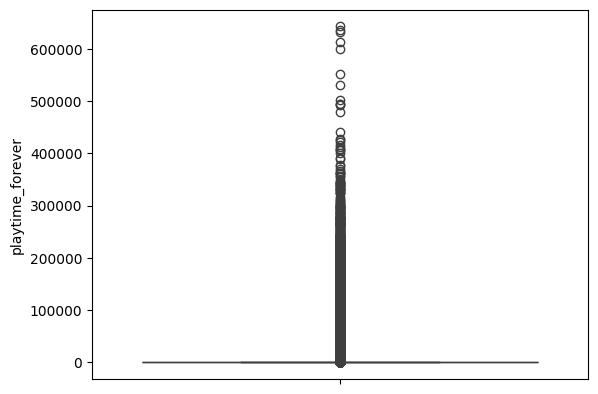

In [11]:
sns.boxplot(data=users_items,y='playtime_forever') # Hago un diagrama de caja para ver outliers

Tiene muchos outliers, pero si se consideran minutos no tienen que ser necesariamente errores

Exporto el dataframe a csv y lo comprimo en gz

In [12]:
users_items.isnull().sum()

user_id             0
items_count         0
item_id             0
playtime_forever    0
dtype: int64

In [ ]:
users_items.to_csv('../datasets/users_items.csv',index=False)

In [13]:
#trabajo con el 10% de la base de datos
porcentaje_a_eliminar = 0.90

# Calcula el número de filas a eliminar
num_filas_a_eliminar = int(len(users_items) * porcentaje_a_eliminar)

# Utiliza el método sample para seleccionar aleatoriamente las filas a eliminar
filas_a_eliminar = users_items.sample(n=num_filas_a_eliminar, random_state=42)

# Elimina las filas seleccionadas del DataFrame original
users_items = users_items.drop(filas_a_eliminar.index)

In [ ]:
users_items.to_csv('../datasets/users_items.csv',index=False)

In [ ]:
with gzip.open('../datasets/users_items_project.csv.gz', 'wb') as f:
    users_items.to_csv(f, index=False, encoding='utf-8')